## Nilearn 101

We Will do a few steps before we start coding. Most of them are one-time steps, but can be use more than once if needed.
### 1. Create Anaconda environment:
        - Start Anaconda navigator
        - Go to environments
        - Add new
        - install pandas, numpy (using Anaconda)
        - install nielarn
            - Go to terminal 
            - [conda install -c conda-forge nilearn]
### 2. Create a git repository:
        - Go to github and login
        - Add new repository (call it whatever you like)
        - Copy the repository link
### 3. Clone the repository in computer
        - Go to terminal (use conda)
        - git clone [link to github]
        - Set user name and email (one time setup)
            * git config --global user.email "my@email.com"
            * git config --global user.name "My Name"
### 4. Start coding!
        

In [ ]:
print('Hello World!')

In [1]:
import numpy as np
import pandas as pd
import nilearn
import nilearn.plotting
import matplotlib.pyplot as plt # for plotting

### Let's plot a beta map and zmap

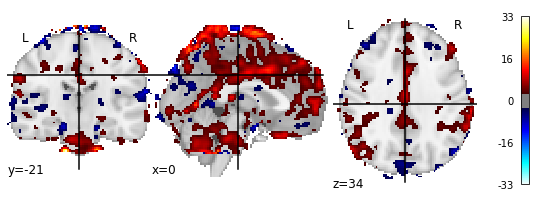

In [2]:
bmap = r"\\172.21.64.190\data\work\RV_FSL\Sink_respNOScrub\1stLevel\_subject_id_1205\results\cope1.nii.gz"
nilearn.plotting.plot_stat_map(bmap, threshold = 3) # adding threshold

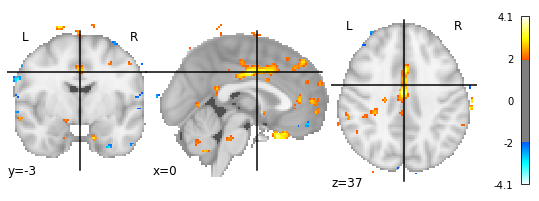

In [3]:
zmap = r"\\172.21.64.190\data\work\RV_FSL\Sink_respNOScrub\1stLevel\_subject_id_1205\results\zstat1.nii.gz"
nilearn.plotting.plot_stat_map(zmap, threshold = 2) # adding threshold

## Now lets plot a timeline
    - first we need to decide how to extract (all voxels? specific ROI? parcellatation?)
    - Nilean has all those options using the NiftiMasker
    - You can look here: http://nilearn.github.io/
    - Specifically: nilearn.github.io/modules/reference.html#module-nilearn.masking

### We will first take a sphere

#### Then we will use parcellation
    - we will use DifuMo but we can use anything

In [8]:
import nilearn.input_data
coords = [[12, 56, 4]]
tr = 2
masker = nilearn.input_data.NiftiSpheresMasker(seeds=coords, radius = 5,
                                              smoothing_fwhm=5, standardize=True,
                                            detrend=True, t_r=tr, high_pass=.01, low_pass=.1, 
                                               memory_level=5, memory = "nilearn",
                                        verbose = 9
                                             ).fit()

In [ ]:
#file = r"//172.21.64.190/data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_BIDS/derivatives/fmriprep/sub-1223/ses-2/func/sub-1223_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
#file = r"C:\Users\Or Duek\Downloads\workshop\func_files\sub-1561_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
file_nf = r"//172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
matrix = masker.transform(file_nf)

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('//172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': False,
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 5,
  'seeds': [[12, 56, 4]],
  'smoothing_fwhm': 5,
  'standardize': True,
  't_r': 2}, confounds=None, dtype=None, memory=Memory(location=nilearn\joblib), memory_level=5, verbose=9)
[NiftiSpheresMasker.transform_single_imgs] Loading data from //172.21.64.190/data/Lab_Knowledge/nilearnWorkshop/workshop/func_NF/sub-1527_ses-1_task-rest1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz


In [6]:
# lets see the shape
matrix.shape

(580, 1)

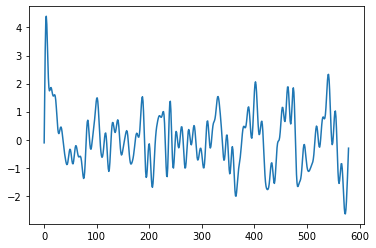

In [7]:
# plot this timeline
plt.plot(matrix)

### Well nice but problematic - we didn't account for confounds etc. Lets do that
1. Read confound file
    - Pick relevant regresors
2. Read preproc image file
run the same masker

In [3]:
# load regressor file
confound_file = r"C:\Users\Or Duek\Downloads\workshop\func_files\sub-1561_ses-2_task-rest_desc-confounds_regressors.tsv"
conf = pd.read_csv(confound_file, sep = "\t")
conf.columns

Index(['csf', 'csf_derivative1', 'csf_derivative1_power2', 'csf_power2',
       'white_matter', 'white_matter_derivative1', 'white_matter_power2',
       'white_matter_derivative1_power2', 'global_signal',
       'global_signal_derivative1',
       ...
       'aroma_motion_161', 'aroma_motion_162', 'aroma_motion_163',
       'aroma_motion_164', 'aroma_motion_165', 'aroma_motion_167',
       'aroma_motion_168', 'aroma_motion_169', 'aroma_motion_170',
       'aroma_motion_171'],
      dtype='object', length=842)

In [6]:
confounds = conf[["csf","white_matter", "framewise_displacement", 
                 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
confounds = confounds.fillna(0) # change NA to 0, as madker neeeds

In [10]:
# load parcellation 
#atlas_img = r'//172.21.64.190/data/work/DiFuMo_atlas/64/maps.nii.gz'
atlas_img = r"C:\Users\Or Duek\Downloads\workshop\atlas\64\maps.nii.gz"
import nilearn.input_data
masker = nilearn.input_data.NiftiMapsMasker(maps_img=atlas_img,
                                            smoothing_fwhm=5, standardize=True,
                                            detrend=True, t_r=1, high_pass=.01, low_pass=.1, memory_level=9,
                                            memory = "nilearn",
                                        verbose = 9).fit()

[NiftiMapsMasker.fit] loading regions from C:\Users\Or Duek\Downloads\workshop\atlas\64\maps.nii.gz


In [11]:
#file = r"//172.21.64.190/data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_BIDS/derivatives/fmriprep/sub-1223/ses-2/func/sub-1223_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
file = r"C:\Users\Or Duek\Downloads\workshop\func_files\sub-1561_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
matrix_parc = masker.transform(file, confounds=np.array(confounds))

MemoryError: 

In [ ]:
# what is the shape?
matrmatrix_parcix.shape